In [4]:
#yfinance is a popular Python library used for downloading historical market data from Yahoo Finance.
#It simplifies the process of accessing financial data for various securities, including stocks, commodities, cryptocurrencies, and more

!pip install yfinance

In [5]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn import metrics
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
#The code fetches historical price data for Bitcoin, Ethereum, Tether, and Binance Coin for the past 5 years and keeps only the Close and Volume columns for each of these cryptocurrencies.
#This cleaned data can then be used for further analysis or machine learning tasks, such as predicting future prices.


btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [7]:
#The parameters lsuffix and rsuffix in the join method are used to add suffixes to overlapping column names when joining two DataFrames
# This is necessary to avoid column name conflicts when the two DataFrames have columns with the same name.

p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [8]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2020-09-15 00:00:00+00:00,10796.951172,32509451925,364.839203,16140584321,1.002487,49718173930,27.202391,861821910
2020-09-16 00:00:00+00:00,10974.905273,30769986455,365.812286,16107612177,1.003444,50682289026,27.964594,664539530
2020-09-17 00:00:00+00:00,10948.990234,38151810523,389.019226,19899531080,1.001878,51695424541,26.993130,512578971
2020-09-18 00:00:00+00:00,10944.585938,26341903912,384.364532,14108357740,0.999502,47248825663,27.399481,482149967
2020-09-19 00:00:00+00:00,11094.346680,22764204008,385.544373,11049507684,1.002017,37361830219,27.251112,331216806


In [9]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2025-09-11 00:00:00+00:00,115507.539062,45685065332,4461.233398,35959212991,1.000266,121507255807,902.983337,2250551806
2025-09-12 00:00:00+00:00,116101.578125,54785725894,4715.246094,43839753626,1.000618,141338448172,925.030701,2648100391
2025-09-13 00:00:00+00:00,115950.507812,34549454947,4668.179688,34843845977,1.000319,119042646333,933.899658,2744192106
2025-09-14 00:00:00+00:00,115407.656250,32798036057,4609.597656,28394160275,1.000528,105982674402,927.241699,2338327311
2025-09-15 00:00:00+00:00,114839.296875,49916522496,4492.180176,39546695680,1.000130,136848261120,918.640442,2500318464


In [10]:
data.shape

(1827, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-09-15 00:00:00+00:00 to 2025-09-15 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1827 non-null   float64
 1   Volume (BTC)   1827 non-null   int64  
 2   Close (ETH)    1827 non-null   float64
 3   Volume (ETH)   1827 non-null   int64  
 4   Close (USDT)   1827 non-null   float64
 5   Volume (USDT)  1827 non-null   int64  
 6   Close (BNB)    1827 non-null   float64
 7   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [13]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [14]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,49380.254484,3.572025e+10,2352.877527,1.843469e+10,1.000187,6.664303e+10,400.824321,1.660252e+09
std,28130.424563,2.156875e+10,983.631719,1.192486e+10,0.000736,4.145034e+10,197.920935,1.347844e+09
min,10246.186523,5.331173e+09,321.116302,2.081626e+09,0.995872,9.989859e+09,22.856977,2.038465e+08
25%,27079.968750,2.136936e+10,1650.618042,1.024022e+10,0.999922,3.915764e+10,265.174362,7.000732e+08
50%,42451.789062,3.115874e+10,2265.692139,1.581725e+10,1.000157,5.712114e+10,349.253723,1.489889e+09
75%,63867.521484,4.435985e+10,3109.723022,2.292441e+10,1.000430,8.191751e+10,579.920197,2.062346e+09
max,123344.062500,3.509679e+11,4831.348633,9.245355e+10,1.011530,3.006686e+11,933.899658,1.798295e+10


#Exploratory Data Analysis

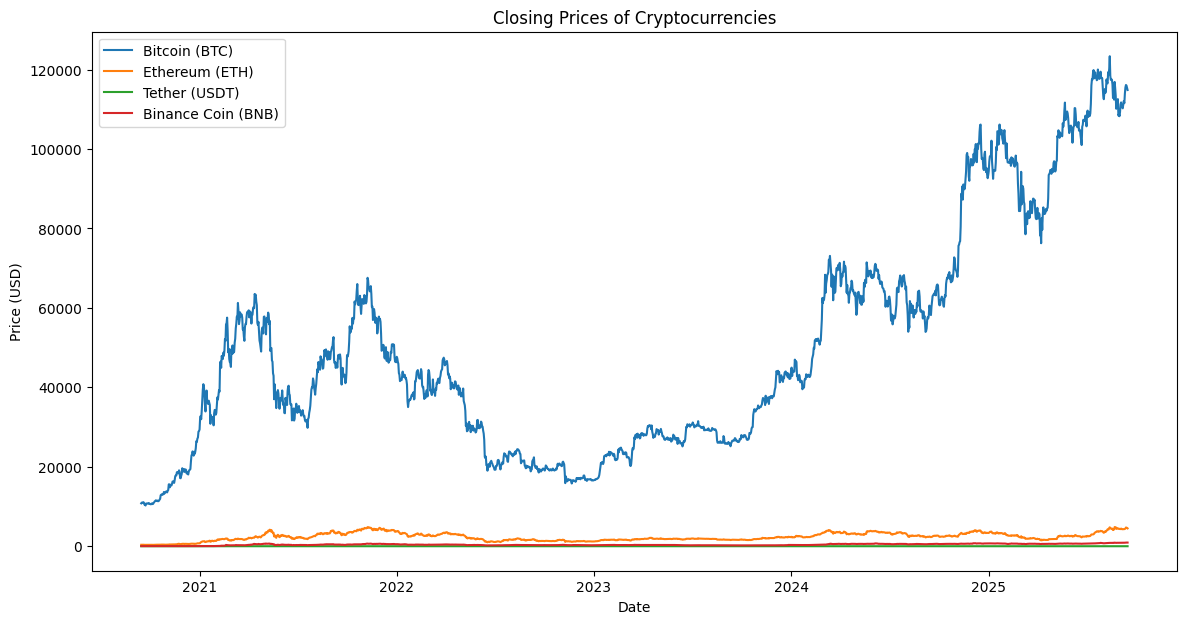

In [15]:
#Visualize the Closing Prices
# create a line plot to visualize the closing prices of all four cryptocurrencies over time:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


<Axes: xlabel='Date'>

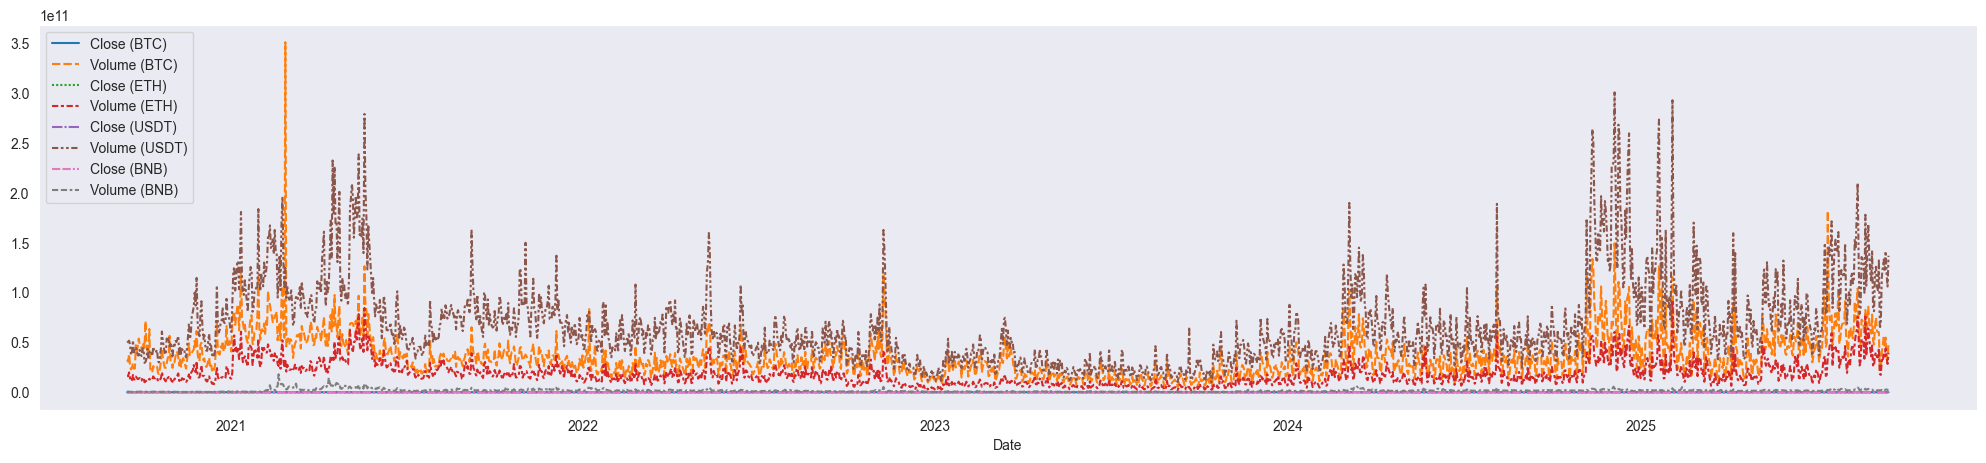

In [16]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

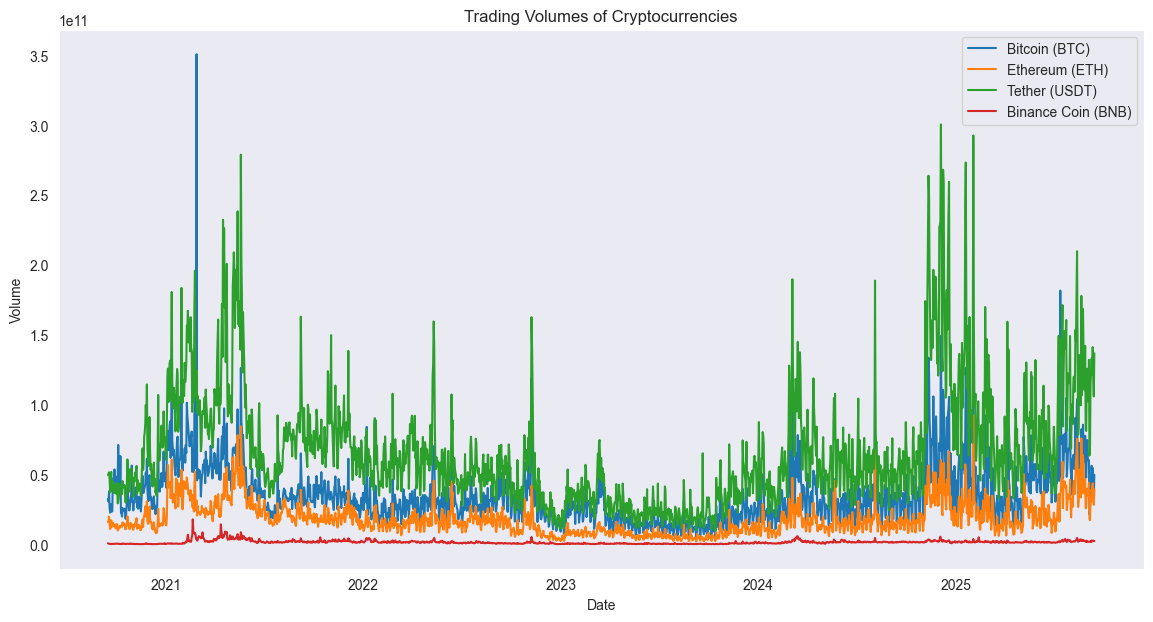

In [17]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


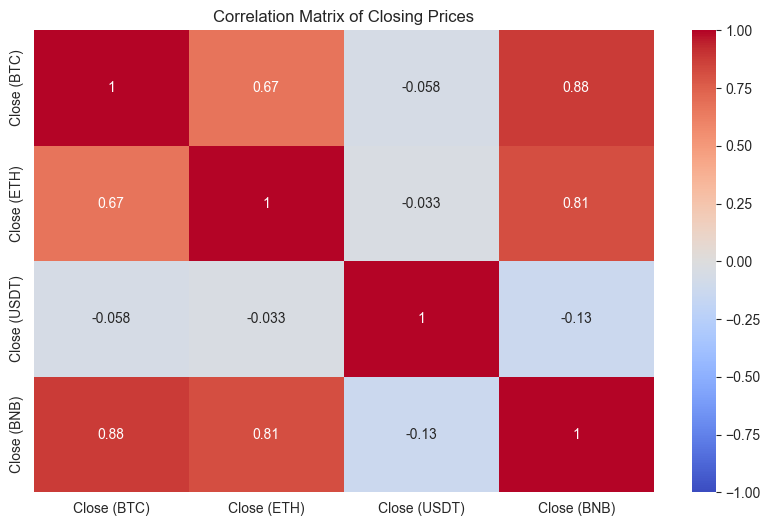

In [18]:
 #Correlation Analysis
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


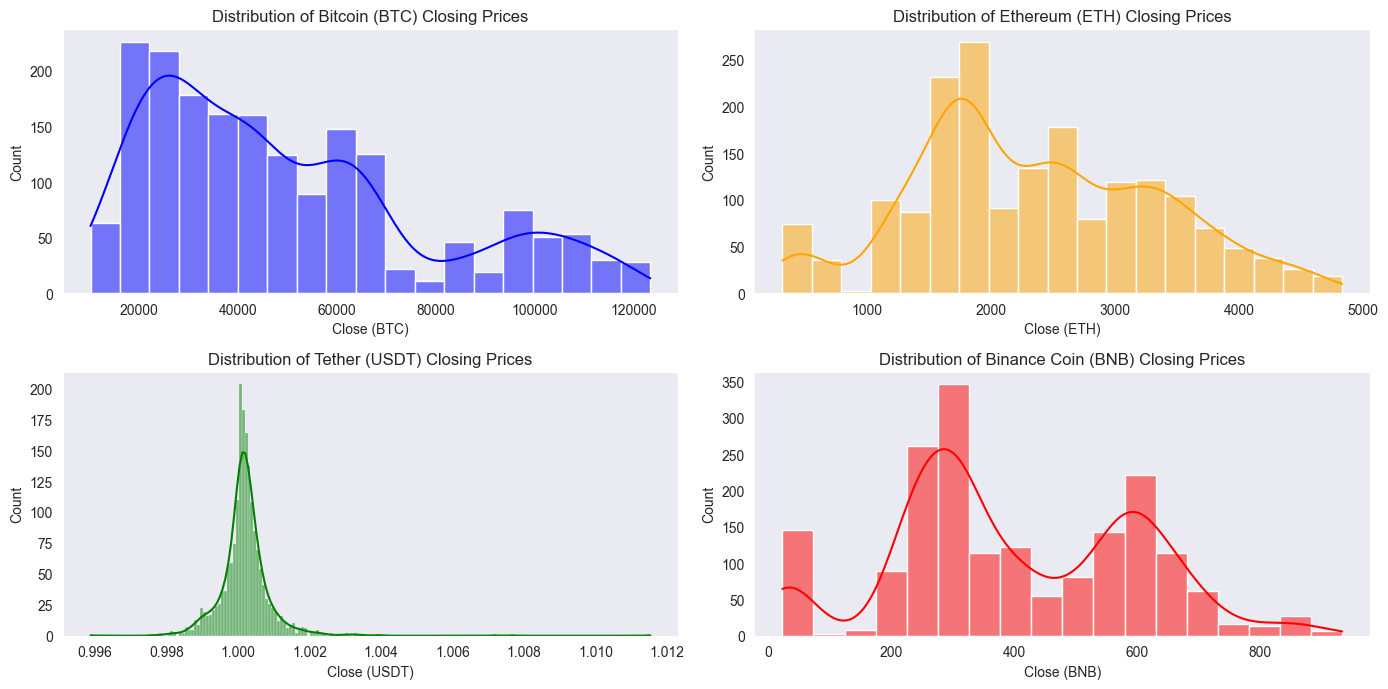

In [19]:
# Distribution of Closing Prices
#Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

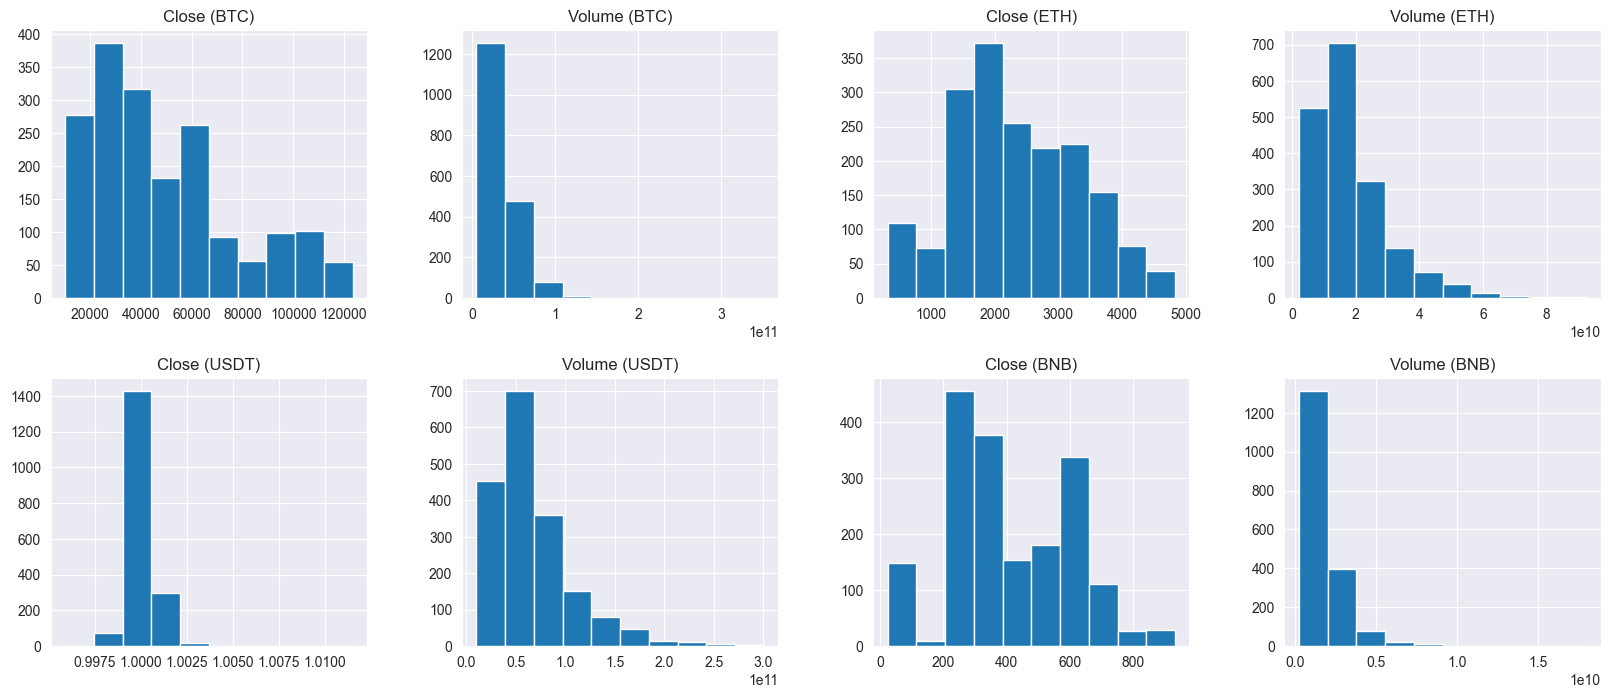

In [20]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

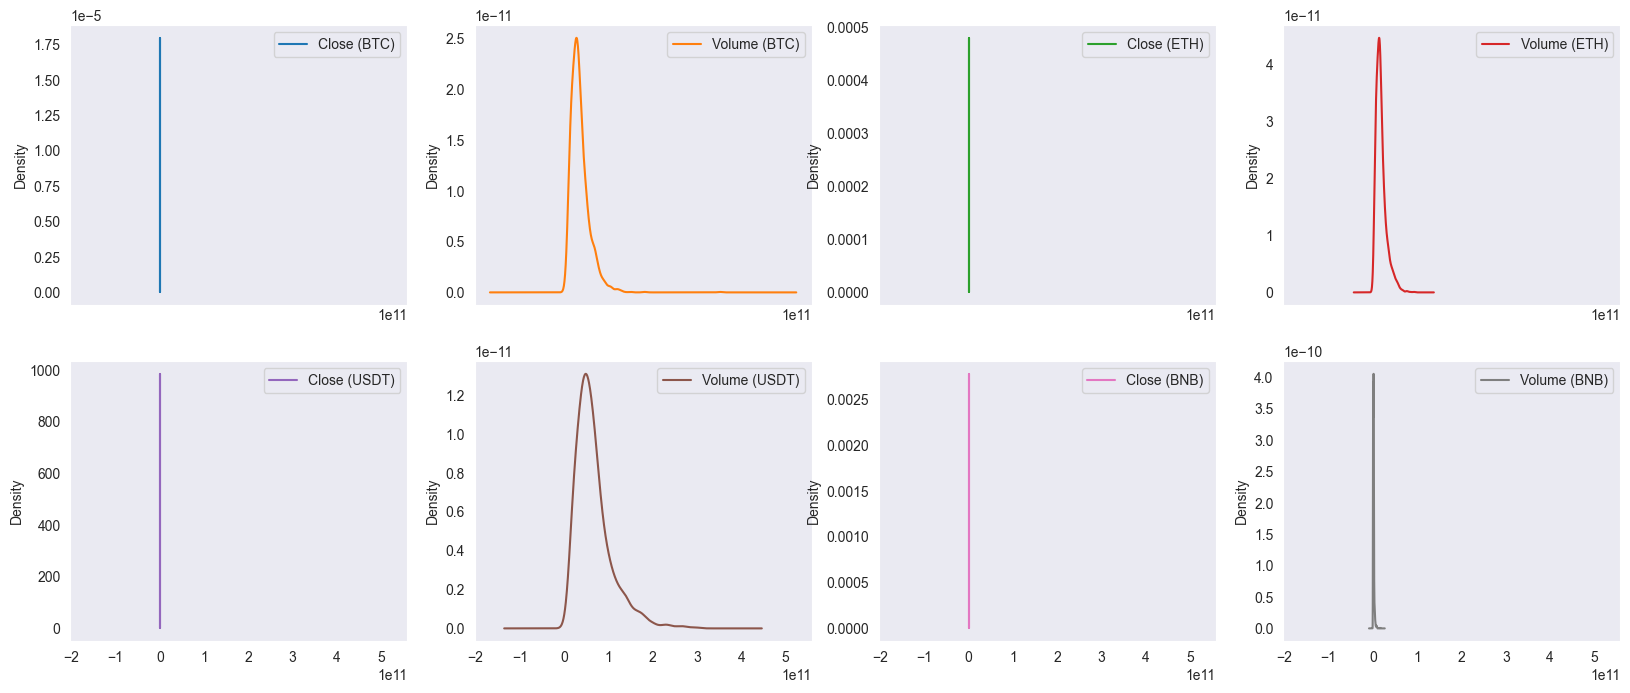

In [21]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

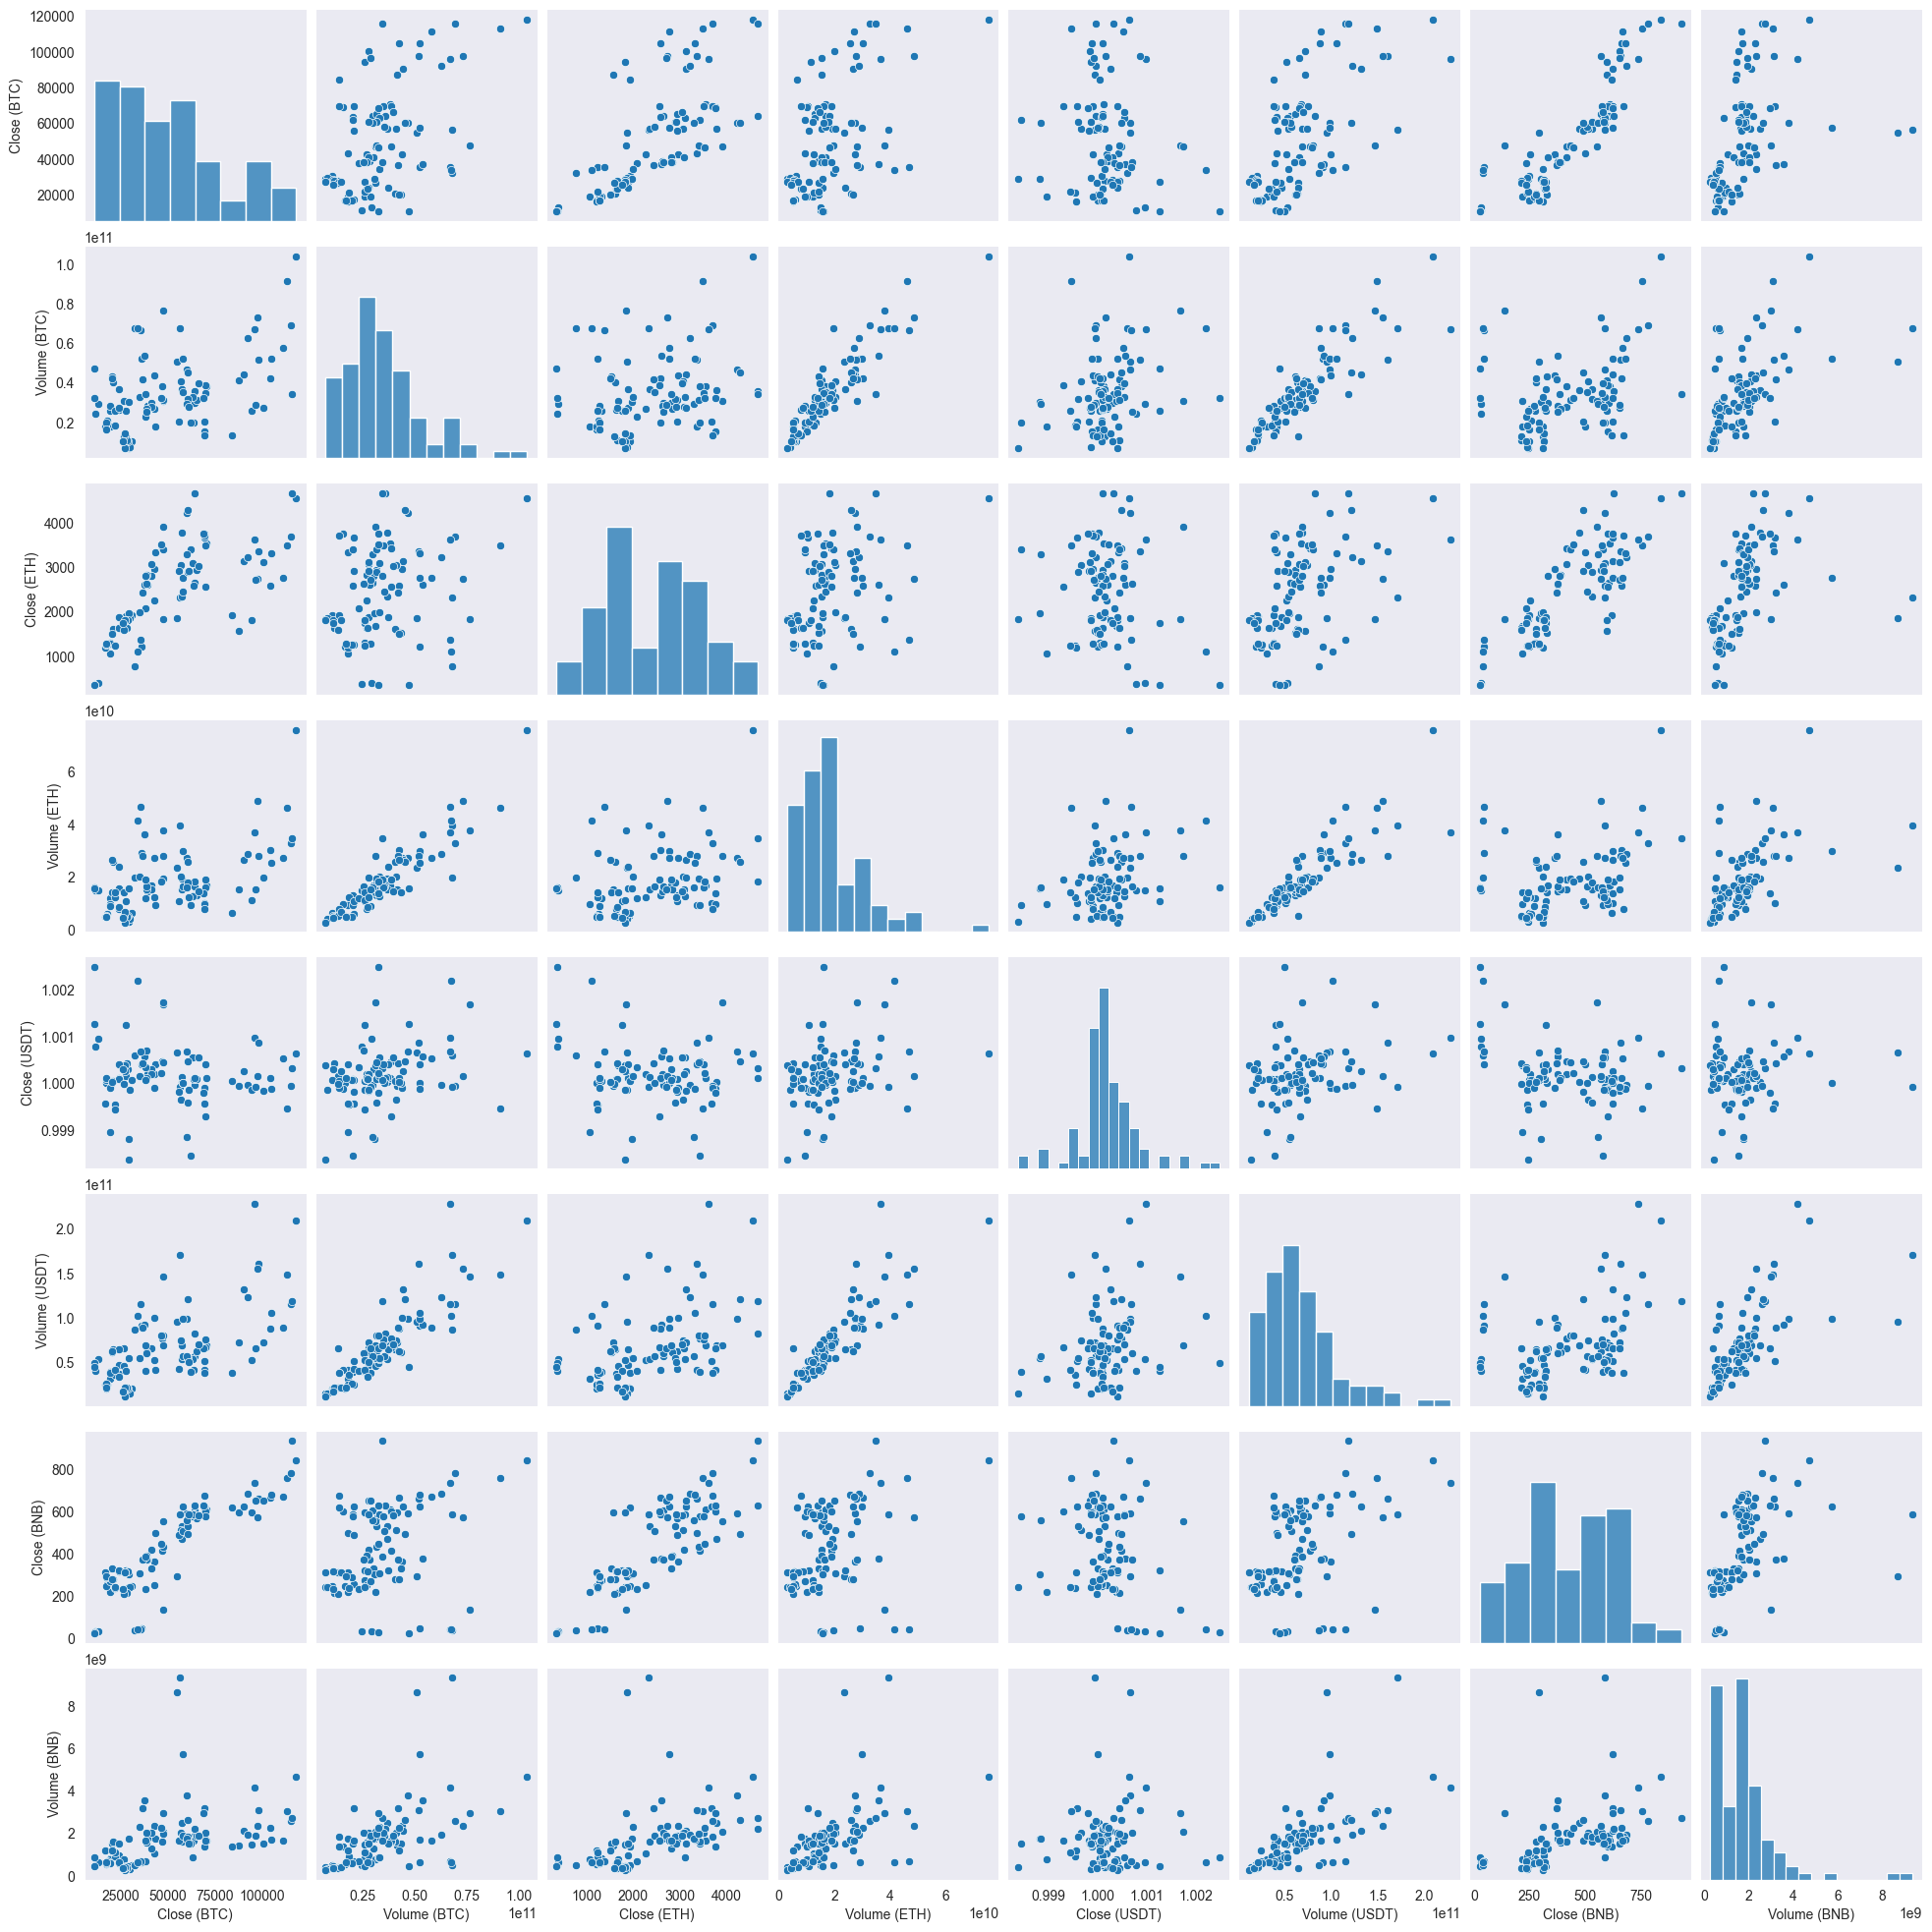

In [22]:
sns.pairplot(data.sample(n=100));

#Data Pre-processing

In [23]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [24]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2020-09-15 00:00:00+00:00,32509451925,364.839203,16140584321,1.002487,49718173930,27.202391,861821910
2020-09-16 00:00:00+00:00,30769986455,365.812286,16107612177,1.003444,50682289026,27.964594,664539530
2020-09-17 00:00:00+00:00,38151810523,389.019226,19899531080,1.001878,51695424541,26.993130,512578971
2020-09-18 00:00:00+00:00,26341903912,384.364532,14108357740,0.999502,47248825663,27.399481,482149967
2020-09-19 00:00:00+00:00,22764204008,385.544373,11049507684,1.002017,37361830219,27.251112,331216806


In [25]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2025-09-11 00:00:00+00:00,45685065332,4461.233398,35959212991,1.000266,121507255807,902.983337,2250551806
2025-09-12 00:00:00+00:00,54785725894,4715.246094,43839753626,1.000618,141338448172,925.030701,2648100391
2025-09-13 00:00:00+00:00,34549454947,4668.179688,34843845977,1.000319,119042646333,933.899658,2744192106
2025-09-14 00:00:00+00:00,32798036057,4609.597656,28394160275,1.000528,105982674402,927.241699,2338327311
2025-09-15 00:00:00+00:00,49916522496,4492.180176,39546695680,1.000130,136848261120,918.640442,2500318464


In [26]:
Y.head()


Date
2020-09-15 00:00:00+00:00    10796.951172
2020-09-16 00:00:00+00:00    10974.905273
2020-09-17 00:00:00+00:00    10948.990234
2020-09-18 00:00:00+00:00    10944.585938
2020-09-19 00:00:00+00:00    11094.346680
Name: Close (BTC), dtype: float64

In [27]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [28]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1461, 7)
X_test shape: (366, 7)
y_train shape: (1461,)
y_test shape: (366,)


In [29]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [30]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features) 

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [31]:
X_train


array([[1.00114000e+00, 6.20206617e+10, 3.43741028e+02, 2.14676141e+09],
       [1.00000894e+00, 9.91203763e+10, 6.24080566e+02, 5.74135805e+09],
       [9.99087989e-01, 5.85856128e+10, 3.16760559e+02, 2.22814410e+09],
       ...,
       [1.00005198e+00, 5.88728010e+10, 6.17816772e+02, 1.60017862e+09],
       [1.00041199e+00, 8.62178716e+10, 4.30390869e+02, 2.12869950e+09],
       [1.00032794e+00, 5.22673480e+10, 2.83579468e+02, 1.31353152e+09]],
      shape=(1461, 4))

In [32]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:

#Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 152515873.8101092
R-squared: 0.8052446110035546

----- Ridge Regression -----
Mean Squared Error (MSE): 152449600.6136616
R-squared: 0.805329238667756

----- Lasso Regression -----
Mean Squared Error (MSE): 152521006.53088182
R-squared: 0.8052380567675547

----- ElasticNet Regression -----
Mean Squared Error (MSE): 666541035.5096884
R-squared: 0.14885935863694633

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 808949086.9671408
R-squared: -0.03298883043977385

----- Decision Tree Regression -----
Mean Squared Error (MSE): 92820489.53288326
R-squared: 0.8814727274334446

----- Random Forest Regression -----
Mean Squared Error (MSE): 43584665.48306533
R-squared: 0.9443444917018748

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 56663862.50980173
R-squared: 0.9276429901396528

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 48731281.20430696
R-squared: 0.9377725125251133

c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


----- Neural Network Regression (MLP) -----
Mean Squared Error (MSE): 627316152.0760059
R-squared: 0.19894763627405554

                             Model           MSE  R-squared
0                Linear Regression  1.525159e+08   0.805245
1                 Ridge Regression  1.524496e+08   0.805329
2                 Lasso Regression  1.525210e+08   0.805238
3            ElasticNet Regression  6.665410e+08   0.148859
4  Support Vector Regression (SVR)  8.089491e+08  -0.032989
5         Decision Tree Regression  9.282049e+07   0.881473
6         Random Forest Regression  4.358467e+07   0.944344
7     Gradient Boosting Regression  5.666386e+07   0.927643
8   K-Nearest Neighbors Regression  4.873128e+07   0.937773
9  Neural Network Regression (MLP)  6.273162e+08   0.198948


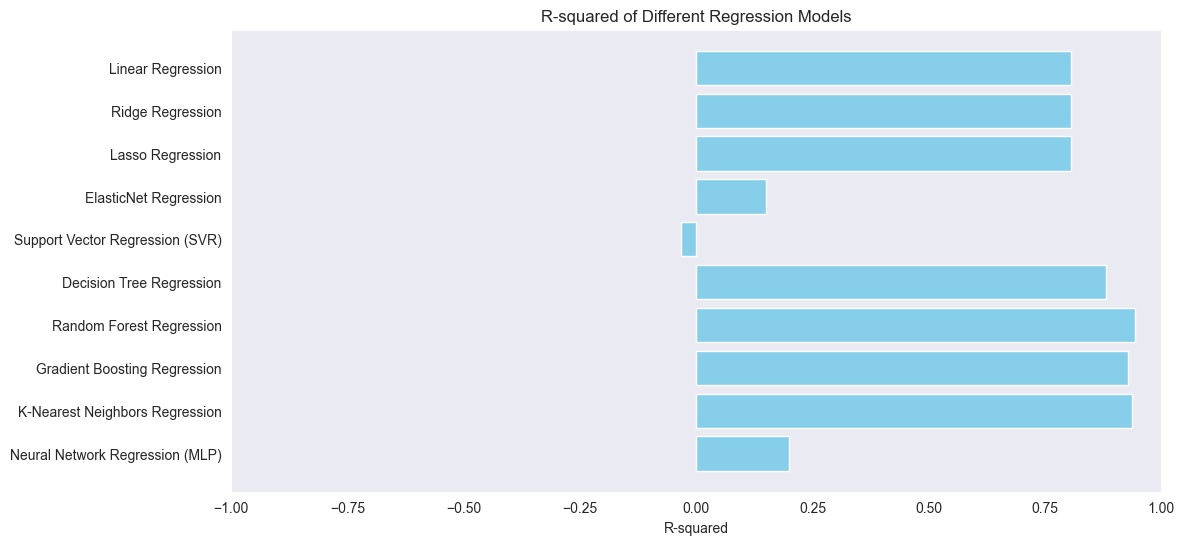

In [35]:

#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()


#Random Forest Regression is a powerful and versatile algorithm suitable for various regression tasks, offering robust performance and the ability to handle complex data relationships

#Saving the Model


In [36]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train, Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Squared Error (MSE): 45105382.43939199
Loaded Random Forest Regression - R-squared: 0.9424026097522515
